In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

max_rent_price = 1500
min_rent_price = 150
min_year = 1900

In [2]:
df = pd.read_excel(".\input\output input all features.xlsx")
df =df.drop([df[pd.isna(df["Kaina mėn.:"])].index][0])
df.head()

,Adresas,Aktyvus iki,Apsauga:,Aukštas:,Aukštų sk.:,Buto numeris:,Kaina mėn.:,Kambarių sk.:,Metai:,Namo numeris:,...,Pastato energijos suvartojimo klasė:,Pastato tipas:,Peržiūrėjo,Plotas:,Redaguotas,Ypatybės:,Įdėtas,Įrengimas:,Įsiminė,Šildymas:
1,https://www.aruodas.lt/butu-nuoma-vilniuje-nau...,NaN,NaN,4.0,6.0,24,890 €,3.0,2017,4,...,NaN,Monolitinis,3641/99 (iš viso/šiandien),76 m²,2019-11-28,NaN,2019-11-11,Įrengtas ...,5.0,Centrinis kolektorinis
2,https://www.aruodas.lt/butu-nuoma-vilniuje-sen...,NaN,NaN,4.0,6.0,24,890 €,3.0,2017,4,...,NaN,Monolitinis,753/35 (iš viso/šiandien),76 m²,2019-11-28,NaN,2019-11-28,Įrengtas ...,2.0,Centrinis kolektorinis
3,https://www.aruodas.lt/butu-nuoma-vilniuje-laz...,NaN,Šarvuotos durys\nKodinė laiptinės spyna,2.0,4.0,NaN,440 €,2.0,2008,NaN,...,NaN,Mūrinis,183/183 (iš viso/šiandien),68 m²,2019-12-04,Aukštos lubos\nNauja kanalizacija\nNauja elekt...,2019-12-04,Įrengtas ...,1.0,Centrinis kolektorinis
4,https://www.aruodas.lt/butu-nuoma-vilniuje-pil...,2020-01-08,Šarvuotos durys\nSignalizacija\nKodinė laiptin...,1.0,4.0,NaN,460 €,2.0,2007,13,...,NaN,Mūrinis,2138/124 (iš viso/šiandien),"56,63 m²",2019-11-27,Internetas\nKabelinė televizija\nVirtuvė sujun...,2019-11-24,Įrengtas ...,1.0,Centrinis kolektorinis
5,https://www.aruodas.lt/butu-nuoma-vilniuje-sen...,2020-01-09,NaN,2.0,3.0,NaN,811 €,3.0,1940,9,...,NaN,Mūrinis,1252/66 (iš viso/šiandien),64 m²,2019-11-25,NaN,2019-11-25,Įrengtas ...,10.0,Dujinis


## Cleaning target col

In [3]:
try:
    df['Kaina mėn.:'] = df['Kaina mėn.:'].str.replace(' €','')
    df['Kaina mėn.:'] = df['Kaina mėn.:'].str.replace(' ','')
    df['Kaina mėn.:'] = df['Kaina mėn.:'].astype(int)
    df = df[df['Kaina mėn.:']< max_rent_price]
    df = df[df['Kaina mėn.:']> min_rent_price]
except:
    print("Target col is converted")
df.rename(columns={"Kaina mėn.:": "rent_price"}, inplace=True)

## Cleaning feature cols

In [4]:
df.rename(columns={"Aukštas:": "floor", "Aukštų sk.:": "total_floor_num",
                   "Kambarių sk.:":"room_num", "Metai:":"year_full",
                   "Plotas:":"area","Pastato tipas:":"House_type", 
                  "Šildymas:":"Heating"
                  }, inplace=True)

In [5]:
df[['year','year_renovation']] = df['year_full'].str.split(',',expand=True)
# cut year int
df['year'] = df['year_full'].str[:4]
df['year'].fillna(df["year_full"],inplace = True)
df["year"] = pd.to_numeric(df["year"],downcast='integer')
df['year_renovation'] = df['year_renovation'].str[:5]
df["year_renovation"] = pd.to_numeric(df["year_renovation"],downcast='integer')

df = df[df['year']> min_year]

In [6]:
try:
    df['area'] = df['area'].str.replace(' m²','')
    df['area'] = df['area'].str.replace(',','.')
except:
    print("Target col is converted")
df["area"] = pd.to_numeric(df["area"],downcast='float')

## Removing not relevant feature columns

In [7]:
df.drop(columns=["Aktyvus iki", "Buto numeris:",
                 "Namo numeris:","Nuoroda","Įdėtas",
                 "Įrengimas:", "Įsiminė",
                 "Pastato energijos suvartojimo klasė:",
                "Redaguotas", "Peržiūrėjo"], inplace = True)

## New features

In [8]:
df["floors_from_top"] = df["total_floor_num"]- df["floor"]
df["top_floor"] = (df["total_floor_num"] == df["floor"]).astype('int')

In [9]:
districts = ["pasilaiciuose", "zveryne", "pilaiteje", "senamiestyje", 
             "naujamiestyje", "uzupyje", "snipiskese", "antakalnyje",
            "zirmunuose","lazdyneliuose", "karoliniskese", "naujojoje-vilnioje", "tarandeje","seskineje",
             "grigiskese", "santariskese", "balsiuose", "siaures-miestelyje",
             "markuciuose", "virsuliskese","fabijoniskese", "valakampiuose",
             "baltupiuose","justiniskese","visoriuose","lazdynuose","jeruzaleje"
             "verkiuose","avizieniuose","filaretuose","kalnenuose",
             "pavilnyje","bajoruose", "burbiskes","naujininkuose","vilkpedeje",
             "zemuosiuose-paneriuose","aukstuosiuose-paneriuose","jeruzaleje"
            ]

def map_district(district):    
    df.loc[df[df['Adresas'].str.contains(district).values].index,"district"] = district
    
for i in districts:
    map_district(i)

In [10]:
df.columns

Index(['Adresas', 'Apsauga:', 'floor', 'total_floor_num', 'rent_price',
       'room_num', 'year_full', 'Papildoma įranga:', 'Papildomos patalpos:',
       'House_type', 'area', 'Ypatybės:', 'Heating', 'year', 'year_renovation',
       'floors_from_top', 'top_floor', 'district'],
      dtype='object')

## Analysis features

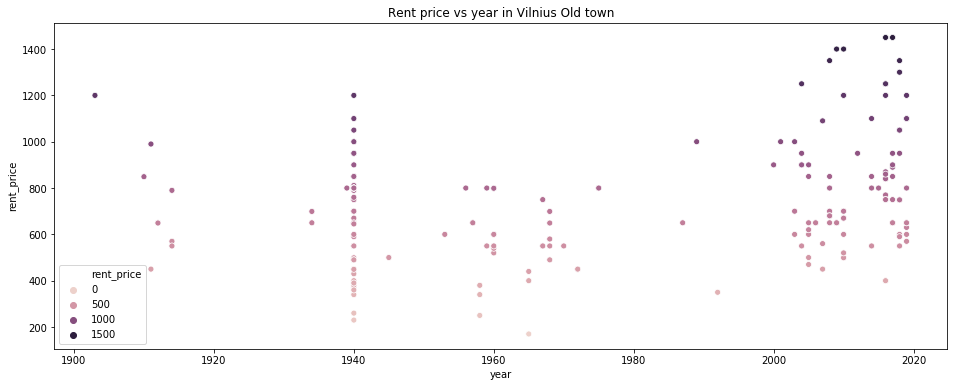

In [11]:
df["year"] = pd.to_numeric(df["year"],downcast='integer')

plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x="year", y="rent_price", hue ="rent_price",           
                     data= df[(df["district"]=="senamiestyje")]
                    ).set_title('Rent price vs year in Vilnius Old town')

## Analysis target

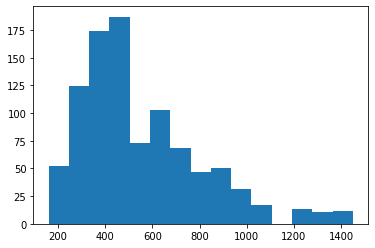

In [12]:
n_bins = 15
plt.hist(df[df["rent_price"] < max_rent_price]["rent_price"], bins=n_bins)
plt.show()

## Export

In [13]:
# df.to_csv(".\output.csv",index=False)